# Đồ án 1 - Color Compression <a class="anchor" id="c2"></a>

**Họ tên: Dương Chí Thông**

**MSSV: 20127634**

**Lớp: 20CLC08**

## Cài đặt thuật toán

### Import các thư viện cần thiết

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### Khởi tạo centroids

In [14]:
def init_centroids_kmean(img_1d,k_clusters,init_centroids):
    if init_centroids == 'random':
        return np.random.randint(0,255, size=(k_clusters, len(img_1d[0])))
    elif init_centroids == 'in_pixels':
        print("in_pixels")
        return img_1d[np.random.choice(img_1d.shape[0], size=k_clusters, replace=False)]
    else:
        raise ValueError('init_centroids must be either "random" or "in_pixels"')

### Xác định các điểm gần trung tâm

In [15]:
def get_label(img_1d, centroid):
    list_distance=[]
    for i in range(0,len(centroid)):
        distance = np.linalg.norm(np.subtract(img_1d ,centroid[i]), axis=1) #tính khoảng cách giữa ảnh và từng centroid
        list_distance.append(distance) #lưu khoảng cách vào mảng
    label = np.argmin(list_distance, axis=0) #lấy index của khoảng cách nhỏ nhất
    return label
    

### Cập nhật lại trung tâm

In [16]:
def get_centroid(img_1d, label, k_clusters):
    n = len(img_1d[0])
    centroids = np.zeros((k_clusters, n))
    for k in range(k_clusters):
        temp = img_1d[np.where(label == k)] 
        # if(len(temp)!=0):
        mean = np.mean(temp, axis=0)
        centroids[k] = mean
    return centroids


### Thuật toán Kmeans

In [17]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    flag=0
    centroid=init_centroids_kmean(img_1d,k_clusters,init_centroids)
    for i in range(max_iter):
        label = get_label(img_1d, centroid) #lấy label của ảnh
        new_centroid = get_centroid(img_1d, label, k_clusters) #cập nhật centroid
        if np.array_equal(centroid,new_centroid): # neu khong co su thay đổi về centroid thì dừng vòng lặp
            flag=1
            break
        centroid = new_centroid #cập nhật centroid mới
    if(flag==0): # nếu chạy hết vòng lăp thì ta tiến cập nhật lại label
        label=get_label(img_1d,centroid)
    return label, centroid

### Hàm main

K-means clustering...
in_pixels


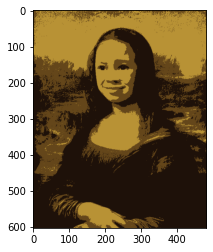

Done!


ValueError: unknown file extension: 

In [18]:
if __name__ == '__main__':
    img_file=input("Enter the image file name: ")
    img = Image.open(img_file)
    img_1d = np.array(img)
    rows,cols=img_1d.shape[0],img_1d.shape[1] 
    img_1d = img_1d.reshape((img_1d.shape[0] * img_1d.shape[1], img_1d.shape[2]))
    k_clusters = int(input("Enter the number of clusters: "))
    max_iter = int(input("Enter the maximum number of iterations: "))
    init_centroids = input("Enter the initial centroids: ")
    print("K-means clustering...")
    label, centroid = kmeans(img_1d,k_clusters,max_iter,init_centroids)
    label = label.reshape(rows, cols) #chuyển label về dạng ảnh
    newImage = np.zeros((rows, cols, 3), dtype = np.uint8) 
    for i in range(rows):
        for j in range(cols):
            newImage[i, j, :] = centroid[label[i, j], :]   # gán giá trị centroid vào ảnh mới
    plt.imshow(newImage) #hiển thị ảnh
    plt.show()
    print("Done!")
    file_name=input("Enter the file name want to save [filename.(jpg/png/pdf)]: ")
    plt.imsave(file_name,newImage)
    print("The image is saved")
